## 19.02.2025

This notebook is to read the data of slow wave examples. 

In [4]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

folder_name = "/home/gs/code/swift-eeg/data/Slow wave examples/"
file_name = "data_FT_EEG_sw2_s02_Wave7_0001.mat"

# Load the .mat file
mat_data = scipy.io.loadmat(folder_name + file_name)

In [5]:
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Dec 20 11:26:52 2024',
 '__version__': '1.0',
 '__globals__': [],
 'F': array([[  9.62189579,  14.55131817,  13.37819958, ..., -65.52362823,
         -67.05801392, -67.70813751],
        [ 16.44041443,  20.21266174,  18.49813271, ..., -34.31856918,
         -38.12159348, -41.2832756 ],
        [ -1.91751993,   2.9232173 ,   3.10884094, ...,  -1.09448457,
          -3.59308052,  -6.71773291],
        ...,
        [-34.55810547, -29.62379265, -26.5471077 , ..., -84.23044586,
         -84.3225174 , -86.18523407],
        [-16.10863876,  -9.55696869,  -7.65121508, ..., -87.03704071,
         -89.50228882, -92.87050629],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]]),
 'Std': array([], shape=(0, 0), dtype=uint8),
 'Comment': array(['FT_EEG_sw2_s02_Wave7'], dtype='<U20'),
 'ChannelFlag': array([[1],
        [1],
        [1],
        [1],
        [1],
        

In [6]:

# Extract the EEG data
F = mat_data['F']  # Shape: (129, 626) -> 129 channels, 626 samples


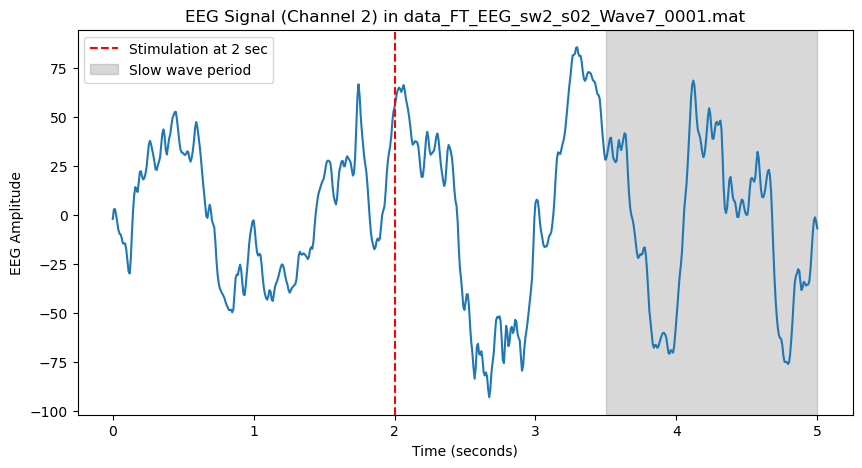

In [7]:

# Sampling rate
fs = 125  # Hz
time = np.arange(F.shape[1]) / fs  # Convert sample indices to seconds

# Select a specific channel for visualization (e.g., channel 0)
channel_idx = 2 
eeg_signal = F[channel_idx, :]

# Plot EEG signal
plt.figure(figsize=(10, 5))
plt.plot(time, eeg_signal)
plt.axvline(x=2, color='r', linestyle='--', label="Stimulation at 2 sec")
plt.axvspan(3.5, 5, color='gray', alpha=0.3, label="Slow wave period")
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Amplitude")
plt.title(f"EEG Signal (Channel {channel_idx}) in {file_name}")
plt.legend()
plt.show()

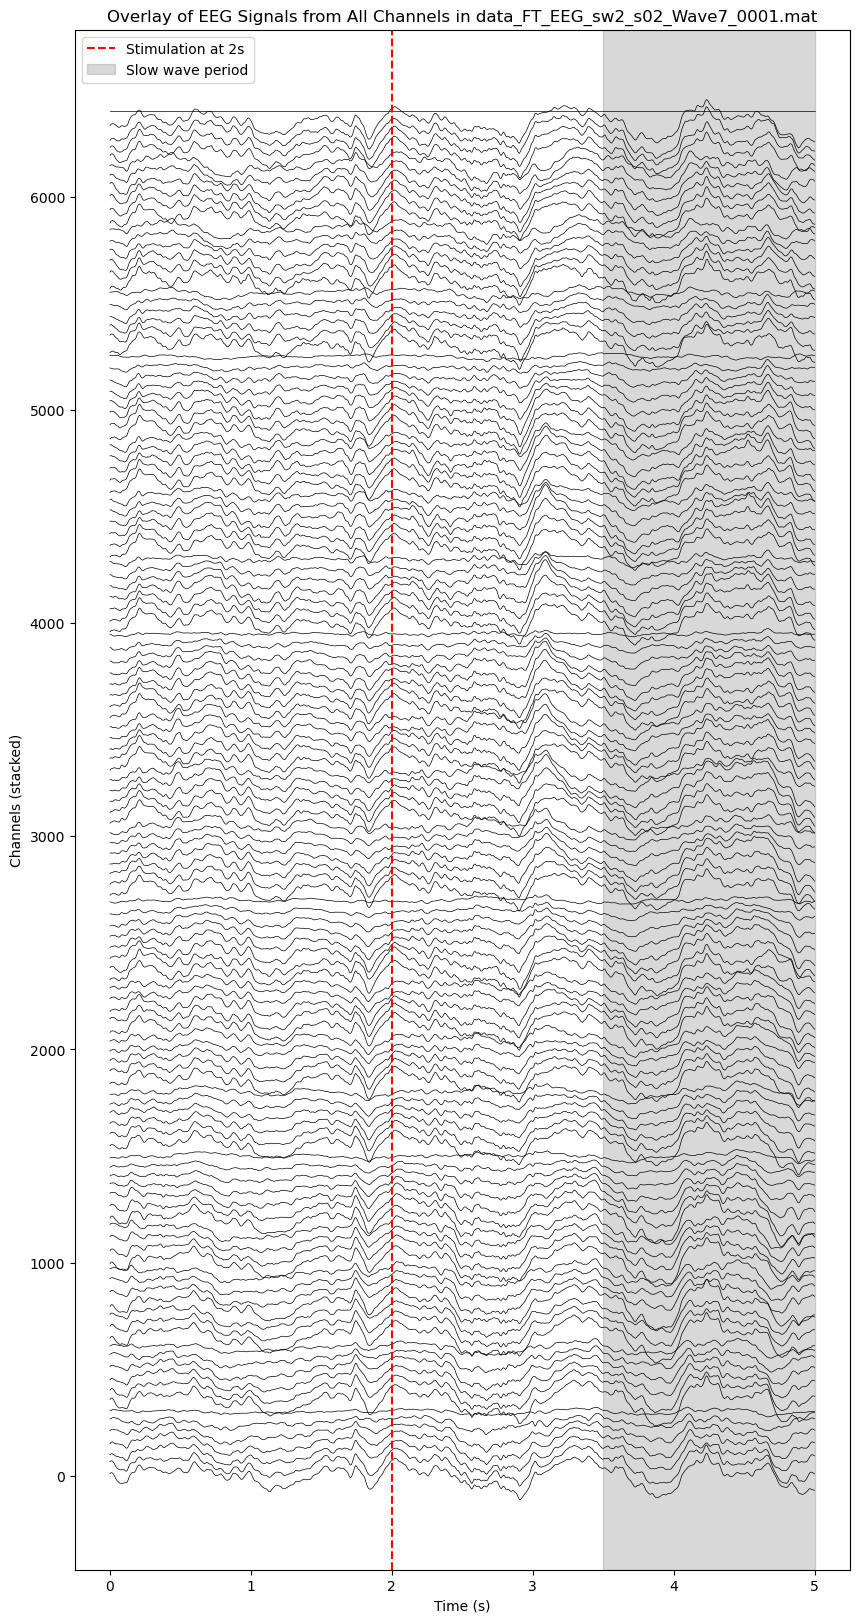

In [8]:
plt.figure(figsize=(10, 20))
for i in range(129):
    plt.plot(
        time, F[i, :] + i * 50, color="black", linewidth=0.5
    )  # Offset for visibility

plt.axvline(x=2, color="r", linestyle="--", label="Stimulation at 2s")
plt.xlabel("Time (s)")
plt.ylabel("Channels (stacked)")
plt.axvspan(3.5, 5, color="gray", alpha=0.3, label="Slow wave period")
plt.title(f"Overlay of EEG Signals from All Channels in {file_name}")
plt.legend()
plt.show()

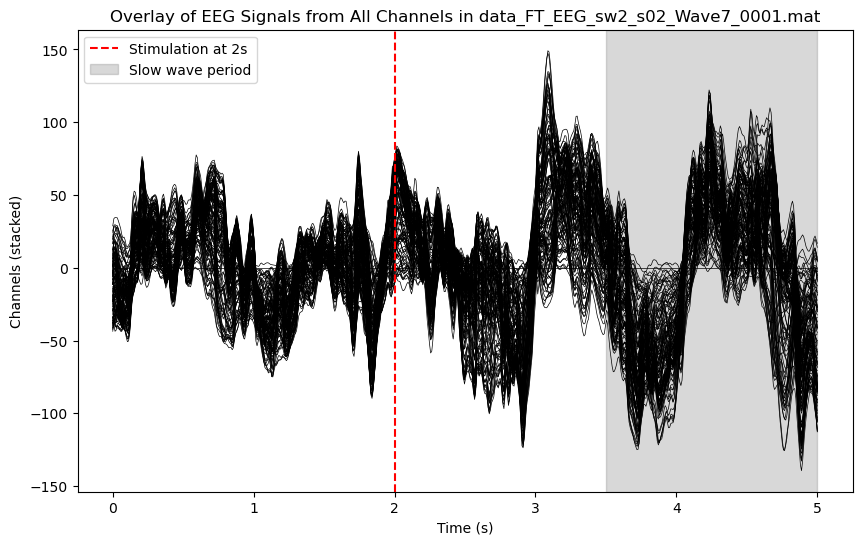

In [9]:
plt.figure(figsize=(10, 6))
for i in range(129):
    plt.plot(
        time, F[i, :], color="black", linewidth=0.5
    )  # Offset for visibility

plt.axvline(x=2, color="r", linestyle="--", label="Stimulation at 2s")
plt.xlabel("Time (s)")
plt.ylabel("Channels (stacked)")
plt.axvspan(3.5, 5, color="gray", alpha=0.3, label="Slow wave period")
plt.title(f"Overlay of EEG Signals from All Channels in {file_name}")
plt.legend()
plt.show()

In [10]:
import numpy as np
import mne
from scipy.signal import butter, filtfilt

# Load EEG data (F: 129 channels x 626 samples)
# Assume F is already loaded from .mat file
fs = 125  # Sampling frequency (Hz)


# 1. Band-pass filtering (0.5–58 Hz)
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return b, a


def bandpass_filter(data, lowcut=0.5, highcut=58, fs=fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data, axis=1)


F_filtered = bandpass_filter(F)


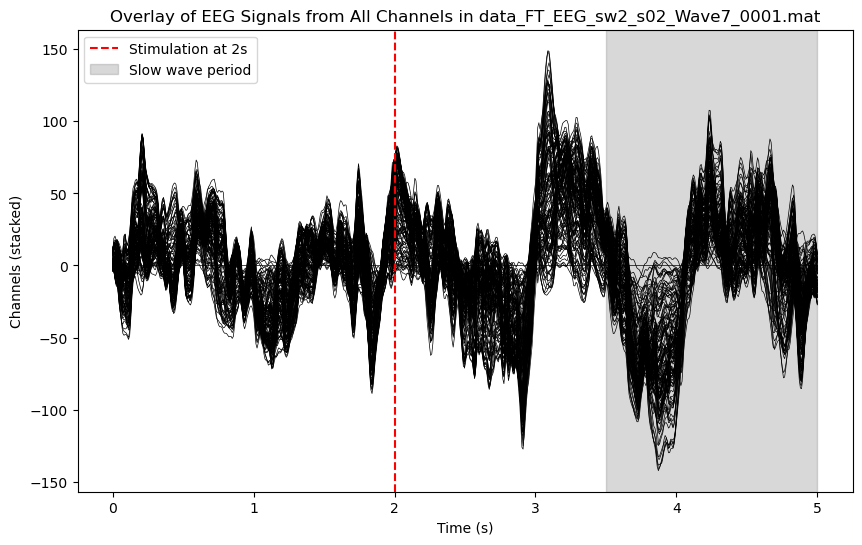

In [11]:
plt.figure(figsize=(10, 6))
for i in range(129):
    plt.plot(
        time, F_filtered[i, :], color="black", linewidth=0.5
    )  # Offset for visibility

plt.axvline(x=2, color="r", linestyle="--", label="Stimulation at 2s")
plt.xlabel("Time (s)")
plt.ylabel("Channels (stacked)")
plt.axvspan(3.5, 5, color="gray", alpha=0.3, label="Slow wave period")
plt.title(f"Overlay of EEG Signals from All Channels in {file_name}")
plt.legend()
plt.show()

In [12]:
%%script echo skipping

# The following lines will NOT run
print("This won't execute!")

skipping


In [13]:

# 2. Extract 20-second epochs for sleep stages N2 and N3
# Assuming sleep stages data (in seconds) is available as 'sleep_stage_labels'
# Needs external sleep staging information (not in F)
epoch_duration = 20  # seconds
epoch_samples = epoch_duration * fs  # Number of samples in 20 seconds
# Extract corresponding epochs (example only, real extraction depends on labels)
F_epochs = []  # List to store extracted epochs


In [14]:
%%script echo skipping

# Assuming we have sleep stage timestamps for N2 and N3
sleep_stages = [...]  # Placeholder: needs actual sleep stage labels
for start_time in sleep_stages:
    start_sample = int(start_time * fs)
    end_sample = start_sample + epoch_samples
    if end_sample <= F_filtered.shape[1]:
        F_epochs.append(F_filtered[:, start_sample:end_sample])

F_epochs = np.array(F_epochs)  # Shape: (num_epochs, 129, epoch_samples)


skipping


In [15]:

# 3. Artifact rejection and interpolation using MNE
montage = mne.channels.make_standard_montage("GSN-HydroCel-129")  # 129-channel system

info = mne.create_info(ch_names=montage.ch_names, sfreq=fs, ch_types="eeg")
raw = mne.io.RawArray(F_filtered, info)
raw.set_montage(montage)


Creating RawArray with float64 data, n_channels=129, n_times=626
    Range : 0 ... 625 =      0.000 ...     5.000 secs
Ready.


<RawArray | 129 x 626 (5.0 s), ~779 KiB, data loaded>

In [16]:
%%script echo skipping

# Detect bad channels (assuming manual or automated artifact detection)
bad_channels = ["E1", "E5", "E20"]  # Example, replace with real detected bad channels
raw.info["bads"] = bad_channels

# Interpolate bad channels using spherical splines
raw.interpolate_bads(reset_bads=True, mode="accurate")

skipping


In [17]:

# 4. Apply ICA to remove ocular, muscular, and ECG artifacts
ica = mne.preprocessing.ICA(n_components=30, random_state=97, max_iter="auto")
ica.fit(raw)

# Detect EOG and ECG artifacts automatically
# eog_indices, _ = ica.find_bads_eog(raw, threshold=3.0)
# ecg_indices, _ = ica.find_bads_ecg(raw, threshold=3.0)

# Remove artifact components
# ica.exclude = eog_indices + ecg_indices
# raw_cleaned = ica.apply(raw)

raw_cleaned = raw 

# 5. Remove 72 neck/face electrodes, retaining 185 scalp channels
# Assuming predefined scalp electrodes list
scalp_channels = raw_cleaned.ch_names[:100]  # Assuming first 185 channels are scalp
raw_cleaned.pick_channels(scalp_channels)



Fitting ICA to data using 129 channels (please be patient, this may take a while)
Selecting by number: 30 components


/tmp/ipykernel_1264/25589529.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 0.2s.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawArray | 100 x 626 (5.0 s), ~616 KiB, data loaded>

In [18]:
# Final preprocessed data

F_preprocessed = raw_cleaned.get_data()  # Shape: (185, 626)

F_preprocessed = F_preprocessed[:, -250:]

F_preprocessed.shape

(100, 250)

In [ ]:
time = np.arange(F_preprocessed.shape[1]) / fs + 3

/tmp/ipykernel_1264/2702215037.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


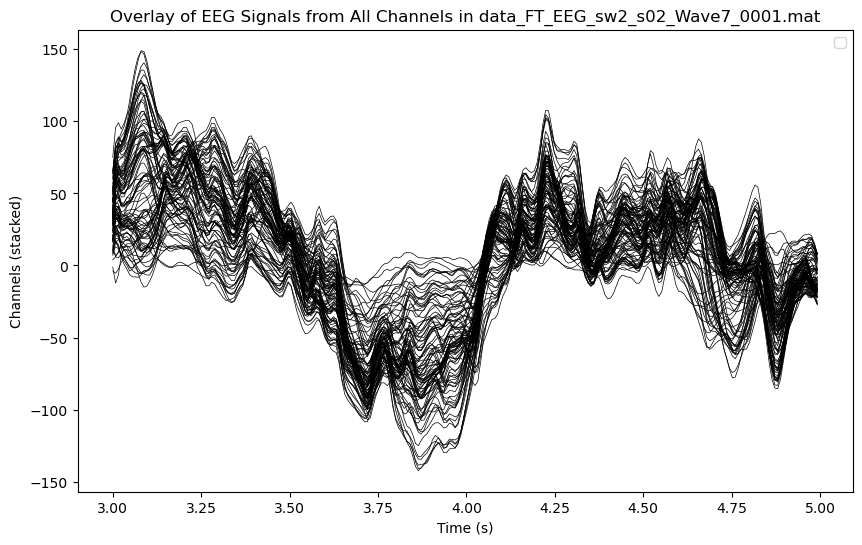

In [20]:
plt.figure(figsize=(10, 6))
for i in range(F_preprocessed.shape[0]):
    plt.plot(
        time, F_preprocessed[i, :], color="black", linewidth=0.5
    )  # Offset for visibility

# plt.axvline(x=2, color="r", linestyle="--", label="Stimulation at 2s")
plt.xlabel("Time (s)")
plt.ylabel("Channels (stacked)")
# plt.axvspan(3.5, 5, color="gray", alpha=0.3, label="Slow wave period")
plt.title(f"Overlay of EEG Signals from All Channels in {file_name}")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Assume F_preprocessed is already available (shape: 185 channels x samples)
fs = 125  # Sampling frequency (Hz)
epoch_length = 20  # seconds
samples_per_epoch = fs * epoch_length  # Total samples in one epoch


# 1. Compute the Negative-Going Signal Envelope
def compute_negative_envelope(F_preprocessed):
    """
    Compute the negative-going signal envelope by selecting the
    5th most negative sample across all channels at each time point.
    """
    sorted_F = np.sort(F_preprocessed, axis=0)  # Sort EEG values per timepoint
    neg_envelope = sorted_F[4, :]  # Select the 5th most negative value
    return neg_envelope


neg_envelope = compute_negative_envelope(F_preprocessed) # neg_envelop shape = (188, )



In [22]:
neg_envelope.shape

(250,)

In [23]:
# 2. Apply Broadband Filtering (0.5–40 Hz, stop-band at 0.1 Hz & 60 Hz)
def bandpass_filter(data, lowcut=0.5, highcut=40, fs=fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype="band")
    return signal.filtfilt(b, a, data)


neg_envelope_filtered = bandpass_filter(neg_envelope)  # shape = (250, )

In [24]:
neg_envelope_filtered.shape


(250,)

/tmp/ipykernel_1264/282059744.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


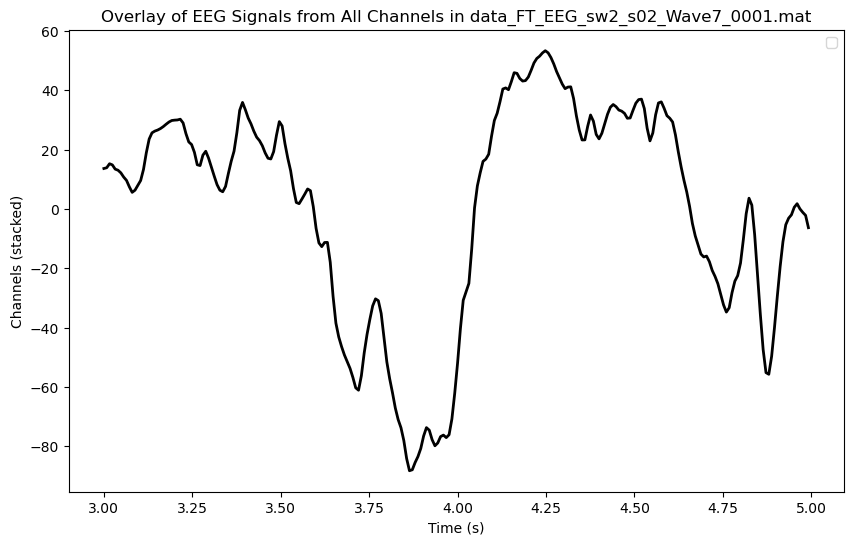

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(time, neg_envelope_filtered, color = "black", linewidth = 2)
# plt.axvline(x=2, color="r", linestyle="--", label="Stimulation at 2s")
plt.xlabel("Time (s)")
plt.ylabel("Channels (stacked)")
# plt.axvspan(3.5, 5, color="gray", alpha=0.3, label="Slow wave period")
plt.title(f"Overlay of EEG Signals from All Channels in {file_name}")
plt.legend()
plt.show()

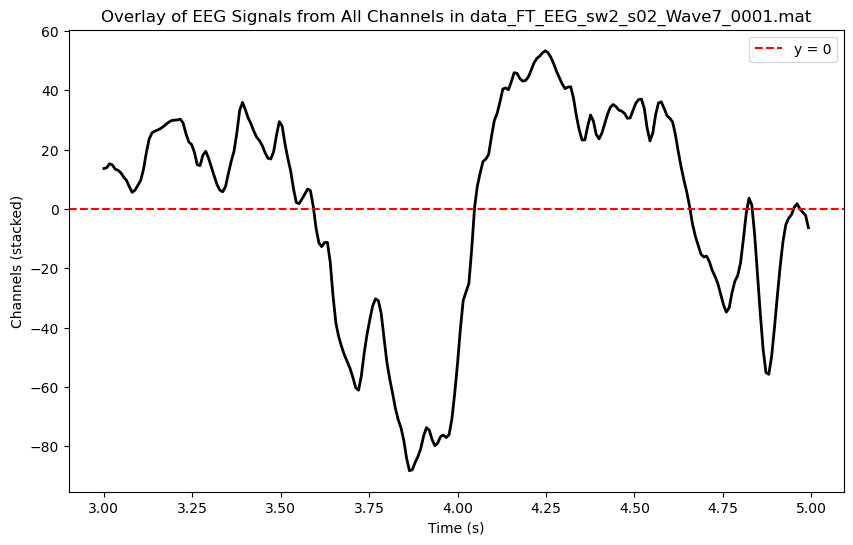

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(time, neg_envelope_filtered, color="black", linewidth=2)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.5, label="y = 0")  # Add horizontal line at y = 0

plt.xlabel("Time (s)")
plt.ylabel("Channels (stacked)")
plt.title(f"Overlay of EEG Signals from All Channels in {file_name}")
plt.legend()
plt.show()

In [28]:
# 3. Detect Slow Waves Based on Zero-Crossings
def detect_slow_waves(neg_envelope, fs):
    """
    Detect slow waves based on zero-crossings in the negative-going envelope.
    """
    zero_crossings = np.where(np.diff(np.sign(neg_envelope)) != 0)[
        0
    ]  # Negative half-waves
    slow_waves = []

    for i in range(len(zero_crossings) - 1):
        t1, t2 = zero_crossings[i], zero_crossings[i + 1]
        duration = (t2 - t1) / fs  # Time in seconds

        if 0.25 <= (t2 - t1) / fs <= 1.0:  # Half-wave duration filter
            
            neg_peak_idx = np.argmin(neg_envelope[t1:t2]) + t1
            amplitude = neg_envelope[neg_peak_idx]
            
            if amplitude < 0:

                slope_1 = (amplitude - neg_envelope[t1]) / ((neg_peak_idx - t1) / fs)
                slope_2 = (neg_envelope[t2] - amplitude) / ((t2 - neg_peak_idx) / fs)

                involvement = np.mean(
                    neg_envelope[
                        neg_peak_idx - int(0.02 * fs) : neg_peak_idx + int(0.02 * fs)
                    ]
                )  # 40ms window

                slow_waves.append(
                    {
                        "duration": duration,
                        "amplitude": amplitude,
                        "neg_peak_idx": neg_peak_idx,
                        "slope_1": slope_1,
                        "slope_2": slope_2,
                        "involvement": involvement,
                    }
                )

    return slow_waves


slow_waves = detect_slow_waves(neg_envelope_filtered, fs)

/tmp/ipykernel_1264/3672336184.py:22: RuntimeWarning: invalid value encountered in scalar divide
  slope_1 = (amplitude - neg_envelope[t1]) / ((neg_peak_idx - t1) / fs)


In [29]:
np.where(np.diff(np.sign(neg_envelope_filtered)) != 0)[0]

array([ 74, 130, 207, 227, 229, 243, 246])

In [30]:
zero_crossings = np.where(np.diff(np.sign(neg_envelope)) < 0)[0]

zero_crossings

array([  8,  31,  51, 166, 181, 183, 191, 198, 200])

In [31]:
import yasa

slow_waves_yasa = yasa.sw_detect(neg_envelope_filtered, sf = fs)


/home/gs/miniconda3/envs/v59_env/lib/python3.11/site-packages/yasa/detection.py:1637: RuntimeWarning: filter_length (2063) is longer than the signal (250), distortion is likely. Reduce filter length or filter a longer signal.
  data_filt = filter_data(


In [32]:
slow_waves_yasa

In [ ]:
import yasa
import mne
import numpy as np

# Assuming F_preprocessed is your preprocessed EEG data
# and has a shape of (n_channels, n_samples)
# Also assuming you have the sampling frequency 'sf' defined

# Create MNE Info object
info = mne.create_info(
    ch_names=[f"Ch{i}" for i in range(F_preprocessed.shape[0])],
    sfreq=fs,
    ch_types="eeg",
)

# Create MNE Raw object
raw = mne.io.RawArray(F_preprocessed, info)

# Detect slow waves using YASA
sw = yasa.sw_detect(raw)

# Get the summary dataframe of detected slow waves
sw_summary = sw.summary()

# Display the first few rows of the summary
print(sw_summary.head())

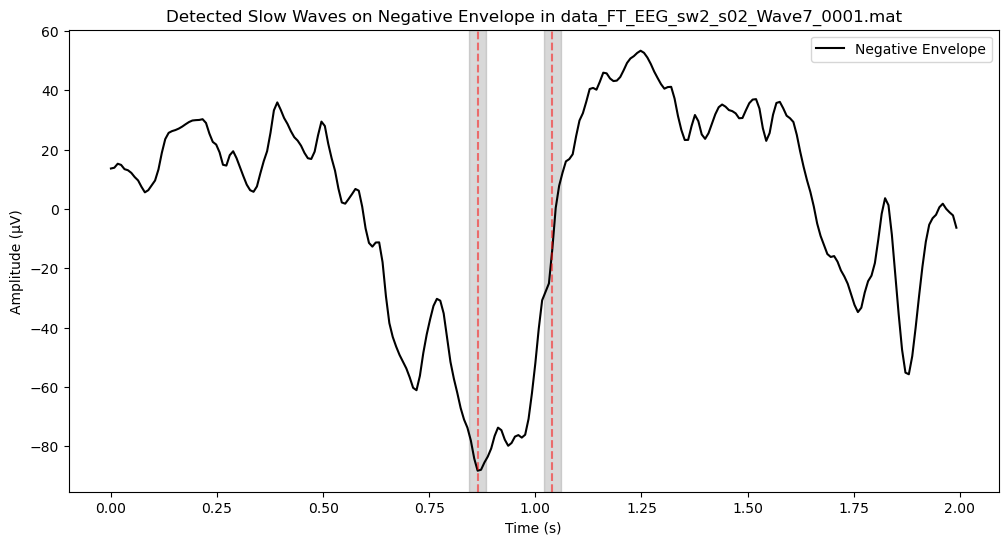

In [34]:

# 4. Plot Slow Waves
plt.figure(figsize=(12, 6))
plt.plot(
    np.arange(len(neg_envelope_filtered)) / fs,
    neg_envelope_filtered,
    label="Negative Envelope",
    color="black",
)

for sw in slow_waves:
    plt.axvline(
        sw["neg_peak_idx"] / fs, color="r", linestyle="--", alpha=0.5
    )  # Mark peak locations
    plt.axvspan(
        sw["neg_peak_idx"] / fs - 0.02,
        sw["neg_peak_idx"] / fs + 0.02,
        color="gray",
        alpha=0.3,
    )  # Involvement window

plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title(f"Detected Slow Waves on Negative Envelope in {file_name}")
plt.legend()
plt.show()

In [35]:
slow_waves

[{'duration': np.float64(0.448),
  'amplitude': np.float64(-88.20916273448665),
  'neg_peak_idx': np.int64(108),
  'slope_1': np.float64(-327.1929406362336),
  'slope_2': np.float64(424.48173851406045),
  'involvement': np.float64(-84.5583076912661)},
 {'duration': np.float64(0.616),
  'amplitude': np.float64(-13.500376756012017),
  'neg_peak_idx': np.int64(130),
  'slope_1': np.float64(nan),
  'slope_2': np.float64(23.297882872529254),
  'involvement': np.float64(-16.539141958090948)}]

In [37]:
slow_waves[0]["neg_peak_idx"]

np.int64(108)

In [38]:
import numpy as np


def compute_synchronization_score(
    F_preprocessed, neg_peak_idx, slope_1, slope_2, fs=125, window_ms=40, threshold=-5
):
    """
    Compute the Synchronization Score (SS) for a given slow wave.

    Parameters:
        F_preprocessed (numpy array): EEG data (channels x samples)
        neg_peak_idx (int): Index of the slow wave negative peak
        slope_1 (float): First slope (zero-crossing to peak, µV/ms)
        slope_2 (float): Second slope (peak to next zero-crossing, µV/ms)
        fs (int): Sampling frequency in Hz (default 125 Hz)
        window_ms (int): Time window in milliseconds (default 40 ms)
        threshold (float): Amplitude threshold in µV (default -5 µV)

    Returns:
        float: Synchronization Score (SS)
    """
    window_samples = int((window_ms / 1000) * fs) // 2  # Half-window size in samples
    start_idx = max(0, neg_peak_idx - window_samples)
    end_idx = min(F_preprocessed.shape[1], neg_peak_idx + window_samples)

    # Compute mean amplitude in the 40 ms window for each channel
    mean_amplitudes = np.mean(F_preprocessed[:, start_idx:end_idx], axis=1)

    # Count channels where mean amplitude < -5 µV
    involved_channels = np.sum(mean_amplitudes < threshold)

    # Compute scalp involvement percentage
    scalp_involvement = (involved_channels / F_preprocessed.shape[0]) * 100

    # Compute mean slope
    mean_slope = (slope_1 + slope_2) / 2

    # Compute Synchronization Score (SS)
    SS = scalp_involvement * mean_slope
    return SS


# Example usage
neg_peak_idx = slow_waves[0]["neg_peak_idx"]  # Example slow wave peak index
slope_1 = slow_waves[0]["slope_1"]  # Example slope-1 in µV/ms
slope_2 = slow_waves[0]["slope_2"]  # Example slope-2 in µV/ms

ss_value = compute_synchronization_score(F_preprocessed, neg_peak_idx, slope_1, slope_2)
print(f"Synchronization Score (SS): {ss_value:.2f}")

Synchronization Score (SS): 4669.86
